# Outline

# Import libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, Binarizer
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

from lightgbm import LGBMRegressor, plot_importance

import graphviz

In [2]:
# Unzip archive
!unzip -o archive.zip

Archive:  archive.zip
  inflating: Equity_Apartments_Data.csv  


In [3]:
# Load data
data = pd.read_csv('Equity_Apartments_Data.csv')
data

,Unnamed: 0,Price,Beds,Baths,sq.ft,Floor,Move_in_date,building_id,unit_id,URL,...,Fireplace,City_Skyline,Kitchen_Island,Stainless_Appliances,Renovated,Office_Space,Days_Till_Available,Day_of_the_week_recorded,Unique_ID,Estiamted_Vacancy
0,1,2377,0,1.0,523,5,2021-09-02,01,0507,https://www.equityapartments.com/washington-dc...,...,0.0,0.0,0.0,1.0,1.0,0.0,47.0,Wednesday,0105071210MassApartments,0.020833
1,2,2816,1,1.0,713,2,2021-09-13,01,0204,https://www.equityapartments.com/washington-dc...,...,0.0,0.0,0.0,1.0,1.0,0.0,58.0,Wednesday,0102041210MassApartments,0.020833
2,3,3811,2,2.0,1252,6,2021-10-08,01,0608,https://www.equityapartments.com/washington-dc...,...,1.0,0.0,0.0,0.0,0.0,0.0,83.0,Wednesday,0106081210MassApartments,0.020833
3,4,1549,0,1.0,456,2,2021-09-17,1,256 \r\n,https://www.equityapartments.com/washington-dc...,...,0.0,0.0,0.0,0.0,0.0,0.0,62.0,Wednesday,1256\r\n1500MassApartments,0.003597
4,5,1753,1,1.0,580,3,2021-10-05,1,337 \r\n,https://www.equityapartments.com/washington-dc...,...,0.0,0.0,0.0,0.0,0.0,0.0,80.0,Wednesday,1337\r\n1500MassApartments,0.003597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62805,62806,3062,2,2.0,1203,6,2021-06-29,NaN,NaN,https://www.equityapartments.com/arlington/cou...,...,0.0,0.0,0.0,0.0,0.0,0.0,13.0,Sunday,NaN,0.032828
62806,62807,3150,2,2.0,1203,5,2021-07-17,NaN,NaN,https://www.equityapartments.com/arlington/cou...,...,0.0,0.0,0.0,0.0,0.0,0.0,31.0,Sunday,NaN,0.032828
62807,62808,3154,2,2.0,1080,19,2021-07-27,NaN,NaN,https://www.equityapartments.com/arlington/cou...,...,0.0,0.0,0.0,0.0,0.0,0.0,41.0,Sunday,NaN,0.032828
62808,62809,3158,2,2.0,1209,7,2021-08-21,NaN,NaN,https://www.equityapartments.com/arlington/cou...,...,0.0,0.0,0.0,0.0,0.0,0.0,66.0,Sunday,NaN,0.032828


## Dataset Overciw

# Data Preprocessing

In [4]:
# Check wheter data contains NaN or Null
data.isnull().sum()

Unnamed: 0                     0
Price                          0
Beds                           0
Baths                          0
sq.ft                          0
Floor                          0
Move_in_date                 788
building_id                  852
unit_id                      852
URL                            0
Day_Recorded                   0
Amenity                     2491
Apartment Name                 0
Address                        0
City                           0
Units                          0
Northern_Exposure           2491
Southern_Exposure           2491
Eastern_Exposure            2491
Western_Exposure            2491
Balcony                     2491
Walk_In_Closet              2491
Fireplace                   2491
City_Skyline                2491
Kitchen_Island              2491
Stainless_Appliances        2491
Renovated                   2491
Office_Space                2491
Days_Till_Available          788
Day_of_the_week_recorded       0
Unique_ID 

In [5]:
# Drop rows which contain NaN or Null
data.dropna(axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)
data

,Unnamed: 0,Price,Beds,Baths,sq.ft,Floor,Move_in_date,building_id,unit_id,URL,...,Fireplace,City_Skyline,Kitchen_Island,Stainless_Appliances,Renovated,Office_Space,Days_Till_Available,Day_of_the_week_recorded,Unique_ID,Estiamted_Vacancy
0,1,2377,0,1.0,523,5,2021-09-02,01,0507,https://www.equityapartments.com/washington-dc...,...,0.0,0.0,0.0,1.0,1.0,0.0,47.0,Wednesday,0105071210MassApartments,0.020833
1,2,2816,1,1.0,713,2,2021-09-13,01,0204,https://www.equityapartments.com/washington-dc...,...,0.0,0.0,0.0,1.0,1.0,0.0,58.0,Wednesday,0102041210MassApartments,0.020833
2,3,3811,2,2.0,1252,6,2021-10-08,01,0608,https://www.equityapartments.com/washington-dc...,...,1.0,0.0,0.0,0.0,0.0,0.0,83.0,Wednesday,0106081210MassApartments,0.020833
3,4,1549,0,1.0,456,2,2021-09-17,1,256 \r\n,https://www.equityapartments.com/washington-dc...,...,0.0,0.0,0.0,0.0,0.0,0.0,62.0,Wednesday,1256\r\n1500MassApartments,0.003597
4,5,1753,1,1.0,580,3,2021-10-05,1,337 \r\n,https://www.equityapartments.com/washington-dc...,...,0.0,0.0,0.0,0.0,0.0,0.0,80.0,Wednesday,1337\r\n1500MassApartments,0.003597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58708,62201,2093,1,1.0,619,11,2021-09-04,01,1103,https://www.equityapartments.com/arlington/cry...,...,0.0,0.0,0.0,0.0,0.0,0.0,71.0,Monday,011103\r\nCrystalPlaceApartments,0.066298
58709,62202,2220,1,1.0,720,11,2021-07-24,01,1101,https://www.equityapartments.com/arlington/cry...,...,0.0,0.0,0.0,0.0,0.0,0.0,29.0,Monday,011101\r\nCrystalPlaceApartments,0.066298
58710,62203,2286,1,1.0,720,2,2021-08-10,01,0201,https://www.equityapartments.com/arlington/cry...,...,0.0,0.0,0.0,0.0,0.0,0.0,46.0,Monday,010201\r\nCrystalPlaceApartments,0.066298
58711,62204,2670,2,2.0,1002,6,2021-09-11,01,0605,https://www.equityapartments.com/arlington/cry...,...,0.0,0.0,0.0,0.0,0.0,0.0,78.0,Monday,010605\r\nCrystalPlaceApartments,0.066298


In [6]:
# Check what columns does data have
data.columns

Index(['Unnamed: 0', 'Price', 'Beds', 'Baths', 'sq.ft', 'Floor',
       'Move_in_date', 'building_id', 'unit_id', 'URL', 'Day_Recorded',
       'Amenity', 'Apartment Name', 'Address', 'City', 'Units',
       'Northern_Exposure', 'Southern_Exposure', 'Eastern_Exposure',
       'Western_Exposure', 'Balcony', 'Walk_In_Closet', 'Fireplace',
       'City_Skyline', 'Kitchen_Island', 'Stainless_Appliances', 'Renovated',
       'Office_Space', 'Days_Till_Available', 'Day_of_the_week_recorded',
       'Unique_ID', 'Estiamted_Vacancy'],
      dtype='object')

In [7]:
# Drop unnecessary columns
columns_drop = ['Unnamed: 0', 'Move_in_date', 'building_id', 'unit_id', 'URL', 'Day_Recorded', 'Amenity', 'Apartment Name', 'Address', 'Day_of_the_week_recorded', 'Unique_ID', 'Estiamted_Vacancy']
data.drop(columns=columns_drop, axis=1, inplace=True)
data

,Price,Beds,Baths,sq.ft,Floor,City,Units,Northern_Exposure,Southern_Exposure,Eastern_Exposure,Western_Exposure,Balcony,Walk_In_Closet,Fireplace,City_Skyline,Kitchen_Island,Stainless_Appliances,Renovated,Office_Space,Days_Till_Available
0,2377,0,1.0,523,5,Washington DC,144,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,47.0
1,2816,1,1.0,713,2,Washington DC,144,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,58.0
2,3811,2,2.0,1252,6,Washington DC,144,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,83.0
3,1549,0,1.0,456,2,Washington DC,556,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0
4,1753,1,1.0,580,3,Washington DC,556,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58708,2093,1,1.0,619,11,Washington DC,181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0
58709,2220,1,1.0,720,11,Washington DC,181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0
58710,2286,1,1.0,720,2,Washington DC,181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0
58711,2670,2,2.0,1002,6,Washington DC,181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0


# Visualization

Text(0.5, 1.0, 'Distribution of Price')

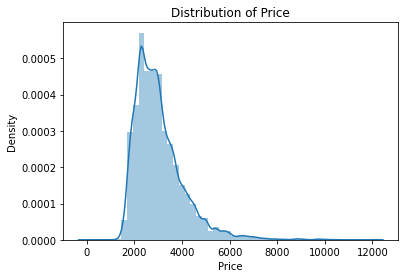

In [8]:
# Check distribution of 'Price'
sns.distplot(data['Price'])
plt.title('Distribution of Price')

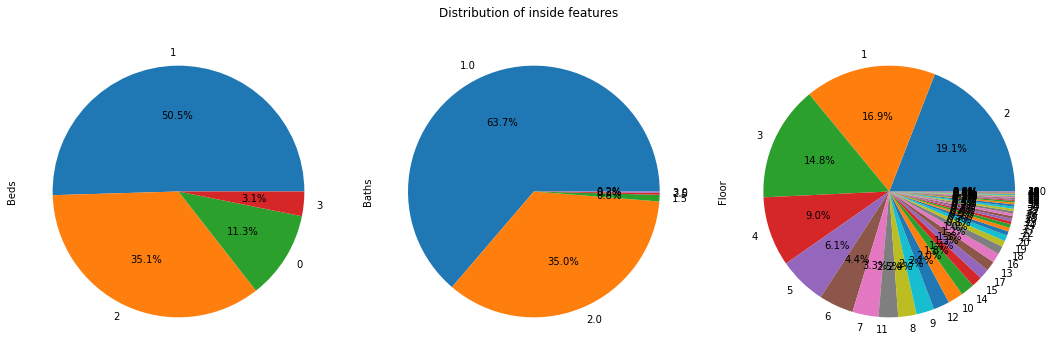

In [9]:
# Plot pie charts indicate features of inside 
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

inside_features = ['Beds', 'Baths', 'Floor']

for i, feature in enumerate(inside_features):
    cols=i%3
    pd.value_counts(data[feature]).plot.pie(autopct="%.1f%%", ax=axs[cols])

plt.suptitle('Distribution of inside features')
plt.tight_layout()

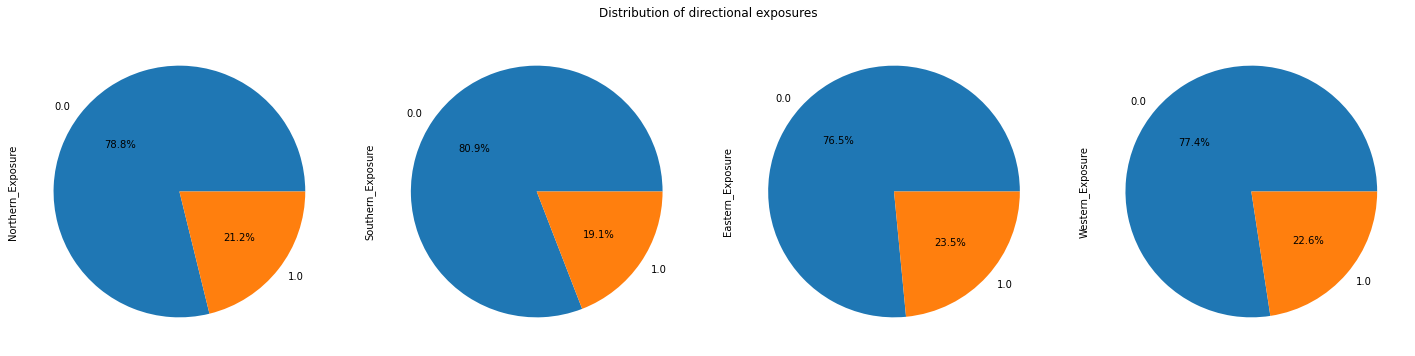

In [10]:
# Plot pie charts indicate features of inside 
fig, axs = plt.subplots(ncols=4, figsize=(20, 5))

exposures = ['Northern_Exposure', 'Southern_Exposure', 'Eastern_Exposure', 'Western_Exposure']

for i, exposure in enumerate(exposures):
    cols=i%4
    pd.value_counts(data[exposure]).plot.pie(autopct="%.1f%%", ax=axs[cols])

plt.suptitle('Distribution of directional exposures')
plt.tight_layout()

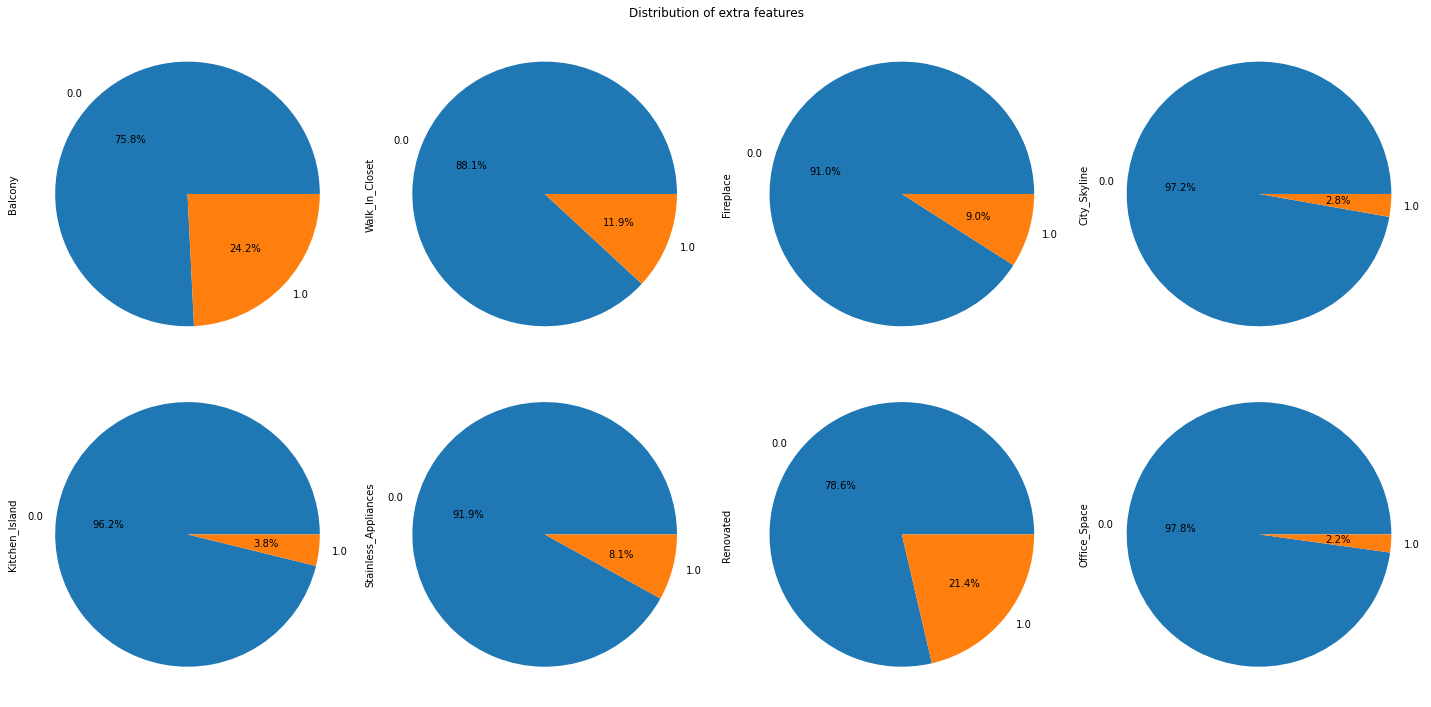

In [11]:
# Plot pie charts indicate extra features
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

extras = ['Balcony', 'Walk_In_Closet', 'Fireplace', 'City_Skyline', 'Kitchen_Island', 'Stainless_Appliances', 'Renovated', 'Office_Space']

for i, extra in enumerate(extras):
    rows=int(i/4)
    cols=i%4
    pd.value_counts(data[extra]).plot.pie(autopct="%.1f%%", ax=axs[rows][cols])

plt.suptitle('Distribution of extra features')
plt.tight_layout()

# Decomposition

<AxesSubplot:title={'center':'Correlation of residential features'}>

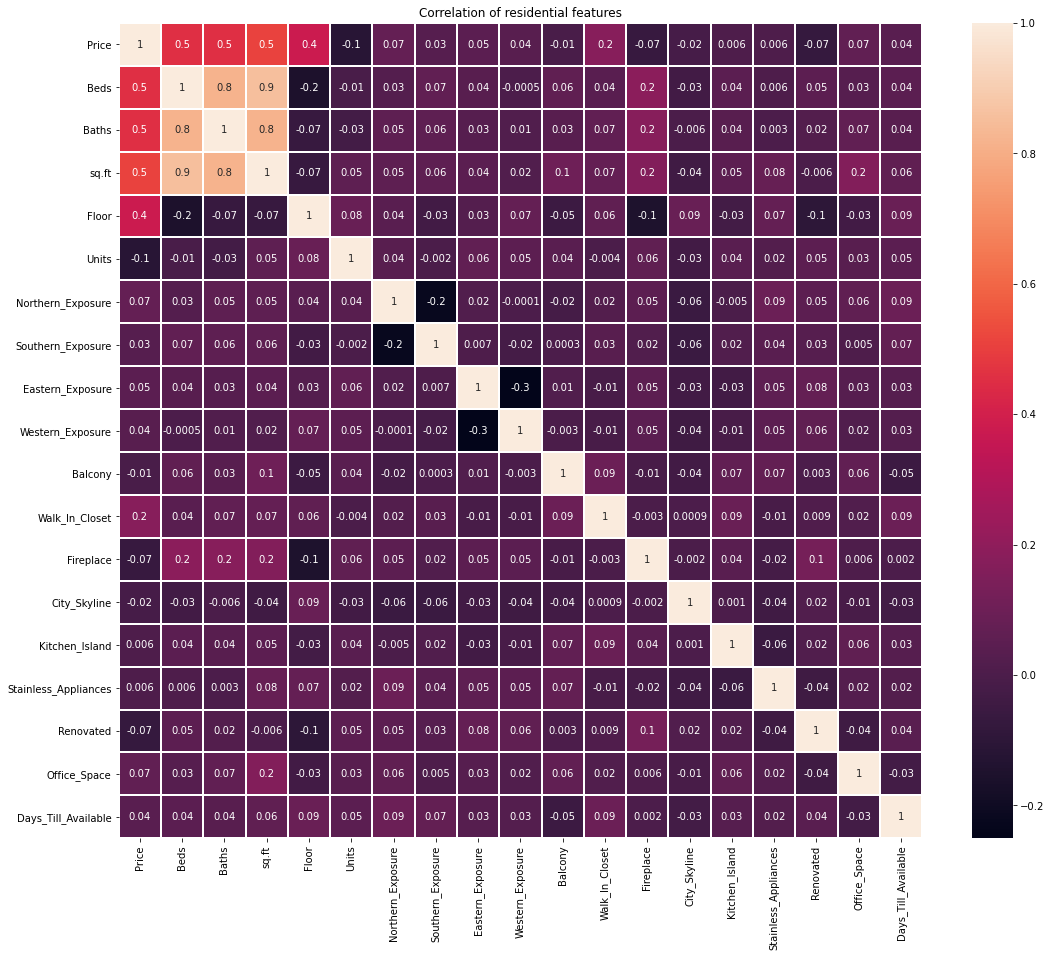

In [12]:
# Correlation Heatmap
fig, ax = plt.subplots(figsize=(18, 15))
plt.title('Correlation of residential features')
sns.heatmap(data.corr(), annot=True, fmt='.1g', linewidths=.3)

In [13]:
# Check variances by features
decom_features = ['Beds', 'Baths', 'sq.ft', 'Balcony', 'Fireplace', 'Office_Space']

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[decom_features])
pca = PCA(n_components=2)
pca.fit(data_scaled)
print('Variance by PCA components: ', pca.explained_variance_ratio_)
print('Total Variance by PCA: ', np.round(pca.explained_variance_ratio_.sum(), 3))

Variance by PCA components:  [0.45568766 0.17744685]
Total Variance by PCA:  0.633


# Split Datasets

In [14]:
# Process One-Hot Encoding
data_ohe = pd.get_dummies(data)
data_ohe

,Price,Beds,Baths,sq.ft,Floor,Units,Northern_Exposure,Southern_Exposure,Eastern_Exposure,Western_Exposure,...,City_Boston,City_Denver,City_Inland Empire,City_Los Angeles,City_New York City,City_Orange County,City_San Diego,City_San Francisco,City_Seattle,City_Washington DC
0,2377,0,1.0,523,5,144,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
1,2816,1,1.0,713,2,144,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,3811,2,2.0,1252,6,144,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
3,1549,0,1.0,456,2,556,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,1753,1,1.0,580,3,556,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58708,2093,1,1.0,619,11,181,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
58709,2220,1,1.0,720,11,181,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
58710,2286,1,1.0,720,2,181,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
58711,2670,2,2.0,1002,6,181,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
# Split datasets
X = data_ohe.iloc[:, 1:]
y = data_ohe.iloc[:, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (46970, 28)
Shape of X_test:  (11743, 28)
Shape of y_train:  (46970,)
Shape of y_test:  (11743,)


# Regression

In [18]:
# Utility Function
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} RMSE: {1}'.format(model.__class__.__name__, np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [19]:
# Create estimators
lr_reg = LogisticRegression()
ridge_reg = Ridge()
lasso_reg = Lasso()

# Fit, Predict and Evaluate by estimators
lr_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LogisticRegression RMSE: 0.66
Ridge RMSE: 0.0
Lasso RMSE: 0.365


[0.6597257112892305, 6.912869221360776e-05, 0.36497053086047226]

In [21]:
# Accuracy Score
print('Accuracy Score of Logistic Regression by train set', np.round(lr_reg.score(X_train, y_train), 3))
print('Accuracy Score of Logistic Regression by test set', np.round(lr_reg.score(X_test, y_test), 3))

Accuracy Score of Logistic Regression by train set 0.623
Accuracy Score of Logistic Regression by test set 0.616


# To be continued
1. Various estimators for regression
2. Hyperparameter tuning with GridSearchCV

**Thank you for you reading my Notebook!**